<a href="https://colab.research.google.com/github/FATOSSAYLAN/PROJE/blob/main/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KÜTÜPHANE VE VERİ KÜMESİNİ İÇERİ AKTARMA

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
start = '2020-01-01'
end = '2023-11-27'
stock = 'VAKKO'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VAKKO']: Exception('%ticker%: No timezone found, symbol may be delisted')


VERİ KÜMESİNİ YÜKLEME ve TÜM VERİ SETİNİN İNCELEME ÖRNEĞİ

In [6]:
data = pd.read_csv('VAKKO.IS.csv')

print(data.shape)
print(data)


(977, 7)
           Date       Open       High        Low      Close  Adj Close  \
0    2020-01-02   4.540000   4.690000   4.540000   4.650000   3.534089   
1    2020-01-03   4.610000   4.690000   4.400000   4.500000   3.420086   
2    2020-01-06   4.410000   4.550000   4.190000   4.210000   3.199681   
3    2020-01-07   4.330000   4.430000   4.290000   4.340000   3.298483   
4    2020-01-08   4.280000   4.400000   4.210000   4.330000   3.290882   
..          ...        ...        ...        ...        ...        ...   
972  2023-11-20  86.000000  86.699997  83.949997  84.349998  84.349998   
973  2023-11-21  84.349998  85.500000  82.000000  83.750000  83.750000   
974  2023-11-22  84.400002  84.400002  82.099998  82.550003  82.550003   
975  2023-11-23  82.550003  83.599998  81.300003  81.300003  81.300003   
976  2023-11-24  81.849998  82.500000  79.000000  80.449997  80.449997   

      Volume  
0    2823867  
1    3256066  
2    2407732  
3    2006070  
4    2125977  
..       ...

100 GÜNLÜK HAREKETLİ ORTALAMA ÇİZDİRME

In [7]:
ma_100_days = data.Close.rolling(100).mean()

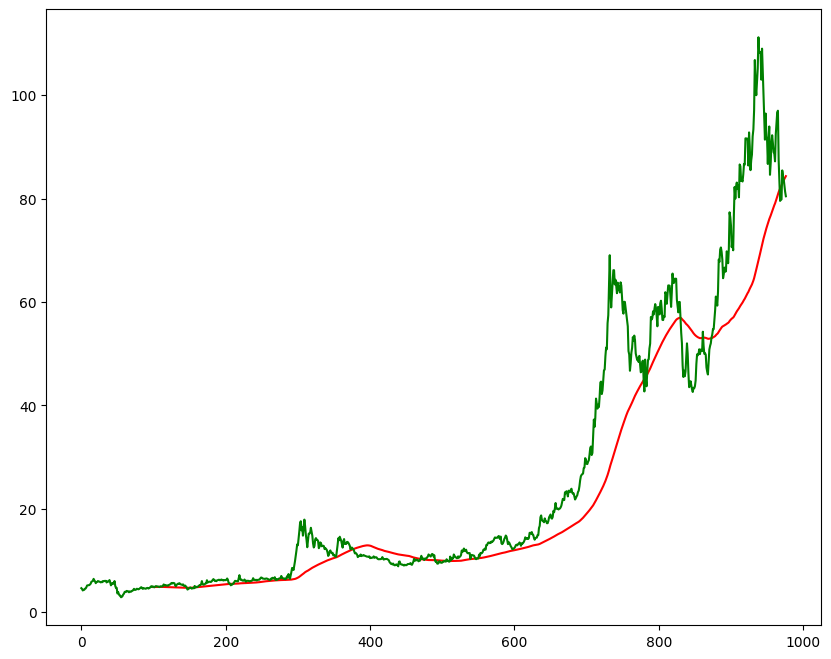

In [8]:
plt.figure(figsize=(10,8))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

200 GÜNLÜK HAREKETLİ ORTALAMA ÇİZDİRME

In [9]:
ma_200_days = data.Close.rolling(200).mean()

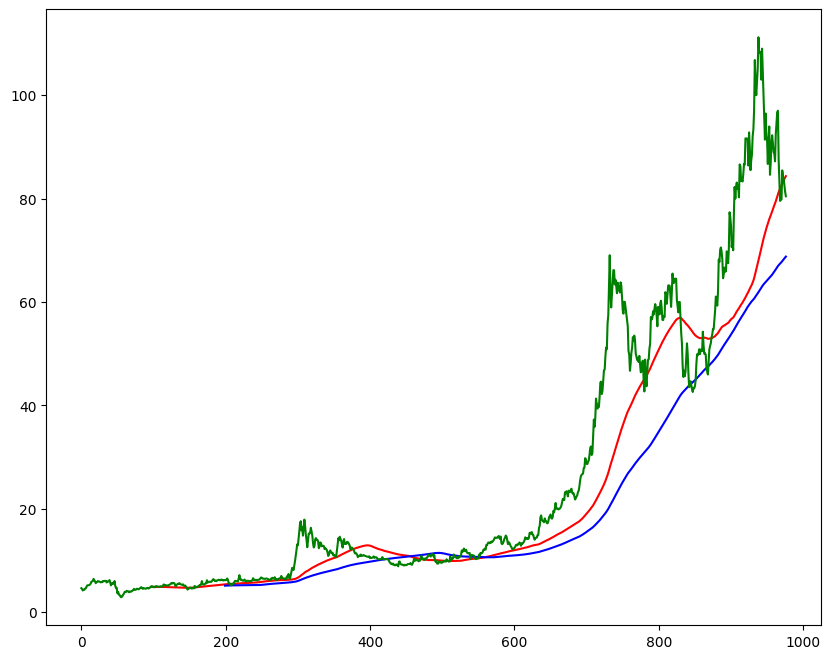

In [10]:
plt.figure(figsize=(10,8))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

Bu kod parçası, bir veri çerçevesi olan data üzerinde bazı işlemler gerçekleştirerek eğitim ve test veri setlerini oluşturuyor.

In [11]:
data.dropna(inplace=True)
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

DATA TRAİN

In [12]:
data_train.shape[0]


781

DATA TEST

In [13]:
data_test.shape[0]

196

MİNMAXSCALER KULLANARAK NORMALİZASYON

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)

LSTM (Long Short-Term Memory)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

MSE (Mean Squared Error)

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

EPOCH ÜRETİMİ

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
22/22 [==============================] - 12s 243ms/step - loss: 0.0368
Epoch 2/50
22/22 [==============================] - 7s 314ms/step - loss: 0.0164
Epoch 3/50
22/22 [==============================] - 6s 250ms/step - loss: 0.0091
Epoch 4/50
22/22 [==============================] - 7s 319ms/step - loss: 0.0065
Epoch 5/50
22/22 [==============================] - 6s 280ms/step - loss: 0.0066
Epoch 6/50
22/22 [==============================] - 8s 349ms/step - loss: 0.0043
Epoch 7/50
22/22 [==============================] - 5s 242ms/step - loss: 0.0046
Epoch 8/50
22/22 [==============================] - 7s 317ms/step - loss: 0.0032
Epoch 9/50
22/22 [==============================] - 5s 239ms/step - loss: 0.0042
Epoch 10/50
22/22 [==============================] - 7s 304ms/step - loss: 0.0029
Epoch 11/50
22/22 [==============================] - 8s 367ms/step - loss: 0.0035
Epoch 12/50
22/22 [==============================] - 13s 579ms/step - loss: 0.0029
Epoch 13/50
22/22 [====

TRAINING

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

Bu kod parçası, önceden belirlenmiş Son 100 gün verileri data_train veri çerçevesinden alarak ve bunları test veri setine ekleyerek yeni bir test veri seti oluşturur. Daha sonra, bu genişletilmiş test veri setini MinMaxScaler kullanarak normalize eder.

In [22]:
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale  =  scaler.fit_transform(data_test)


Bu kod parçası, test veri setinden örnekler oluşturmak için bir pencere (window) yaklaşımını kullanır. Veri seti üzerinde bir döngü oluşturarak, her bir adım için önceki 100 zaman adımına ait verileri (x), ve bir sonraki zaman adımına ait hedef değerleri (y) oluşturur. Bu, zaman serisi verisi üzerinde sıralı örneklerin oluşturulması için tipik bir yöntemdir.

In [23]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)


model.predict(x) ifadesi, eğitilmiş bir Keras modelini kullanarak giriş verisi x üzerinde tahmin yapmayı sağlar. Bu ifade, modelin giriş verisi üzerindeki tahminlerini üretir. Burada, x giriş verisini modele sağlayarak modelin çıkışını elde ediyorsunuz.

In [24]:
y_predict = model.predict(x)

7/7 [==============================] - 1s 70ms/step


Bu kod parçası, önceki bir normalizasyon işlemi sonucunda ölçeklenmiş olan tahmin (y_predict) ve gerçek değerler (y) üzerinde ters ölçekleme uygular. Normalizasyon işlemi sırasında ölçekleme faktörü kullanıldığı için, bu faktörü kullanarak tahminleri ve gerçek değerleri tekrar orijinal ölçeklerine getirmeye çalışır.

In [25]:
scale =1/scaler.scale_
y_predict = y_predict*scale
y = y*scale

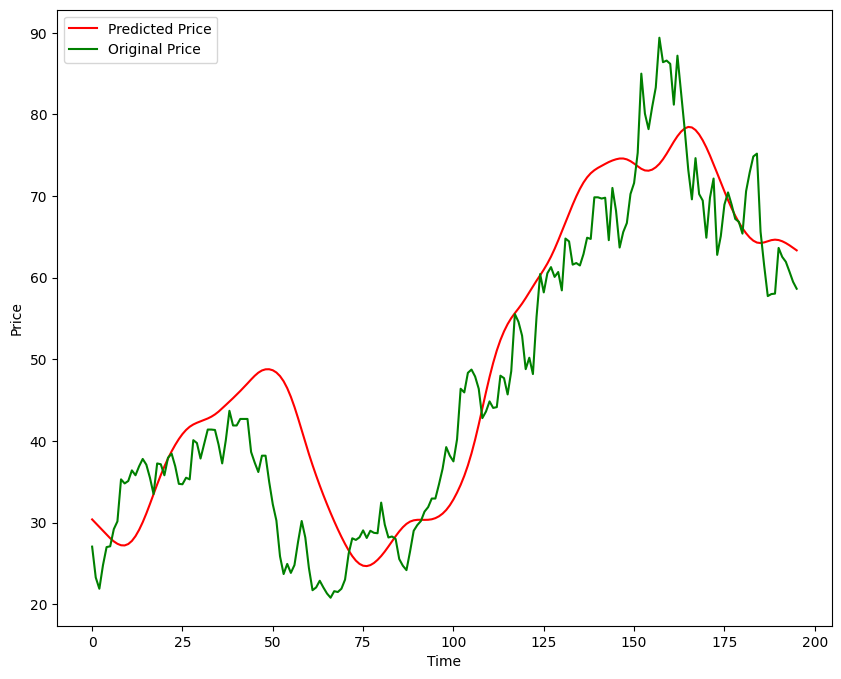

In [26]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Bu kod parçası, iki farklı zaman serisi grafiğini aynı grafik üzerinde çizer. y_predict çizgisi, tahmin edilen fiyatları temsil eder (kırmızı çizgi), y çizgisi ise gerçek fiyatları temsil eder (yeşil çizgi). plt.legend() ifadesi, çizgilerin hangi renklerin ve değerlerin temsil ettiğini açıklamak için bir açıklama (legend) ekler.

Keras kullanılarak eğitilmiş bir modelin tüm yapı, ağırlıklar ve eğitim durumunu içeren bir dosyaya kaydedilmesini sağlar.

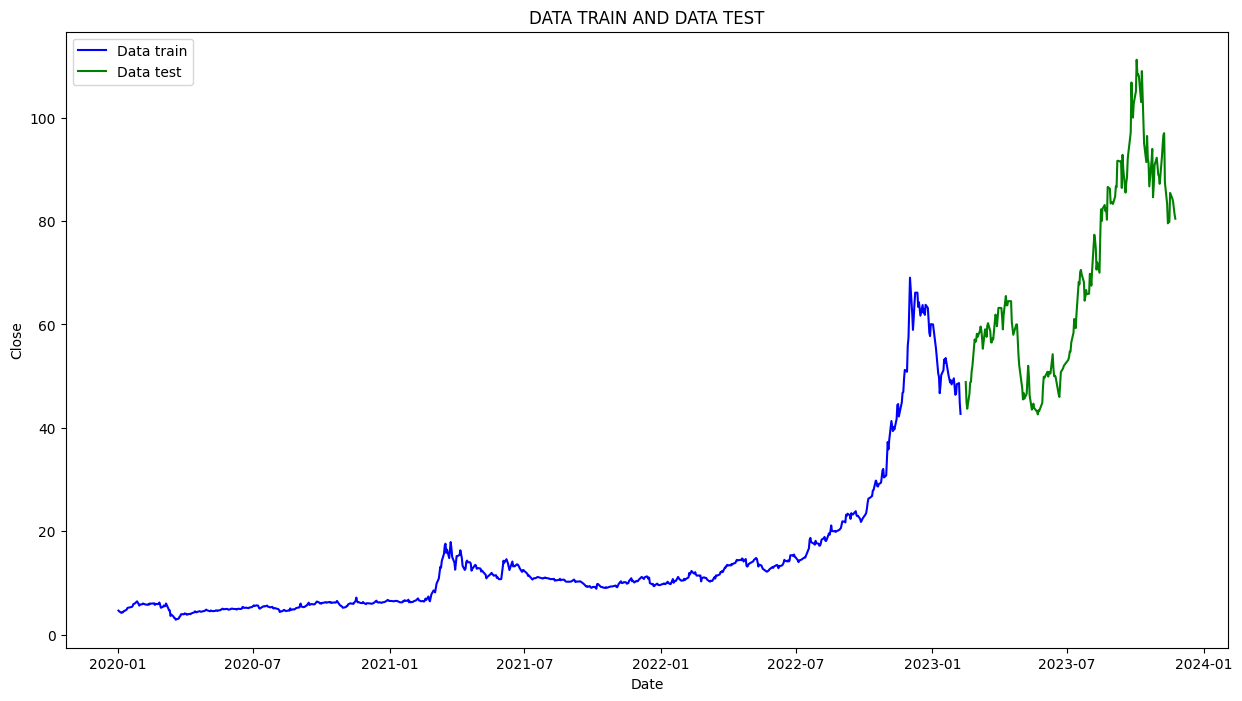

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV dosyasını oku
# CSV dosyanızın doğru yolu ve ismi ile değiştirin
df = pd.read_csv('VAKKO.IS.csv')

# Tarih sütununu datetime formatına çevirme (gerekiyorsa)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Tarih aralığını yüzde 80 ve yüzde 20 olarak bölelim
train_size = int(len(df) * 0.8)
data_train, data_test = df.iloc[:train_size], df.iloc[train_size:]

# Grafik çizdirme
plt.figure(figsize=(15, 8))

# Eğitim seti
plt.plot(data_train.index, data_train['Close'], label='Data train', color='blue')

# Test seti
plt.plot(data_test.index, data_test['Close'], label='Data test', color='green')

plt.title('DATA TRAIN AND DATA TEST')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()


In [28]:
model.save('Stock Predictions Model.keras')